In [4]:
import pandas as pd
import numpy as np
import teradata
import pickle

### importing product details and package charge amount from teradata

In [347]:
import getpass

udaExec = teradata.UdaExec(appName = "Database Access", version = "1.0", logConsole = False)
pw = getpass.getpass()
session = udaExec \
.connect(method = "ODBC", system = "poedw2", username = "nkamavaram", password = pw, authentication = "LDAP")

········


In [24]:
q_june = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2017-06-01' and '2017-06-30' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_june = pd.read_sql(q_june, session)
df_june.to_pickle('june.pkl')

In [385]:
df_june.count()

pkg_id                     589941
sls_trans_line_id          589941
item_full_sku_num          589941
partner_num                589941
calc_zone_num              589941
item_qty                   589941
carr_shpg_typ_cd           589941
carr_shpg_mthd_typ_desc    589941
orgn_terr_cd               589941
dstn_terr_cd               589941
calc_carr_grp_name         589941
item_dim_length_meas       589941
item_dim_width_meas        589941
item_dim_height_meas       589941
full_sku_weight_meas       589941
calc_wght_amt              589941
pkg_chrg_amt               589941
dtype: int64

In [6]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_june = df_june[df_june['calc_zone_num'].isin(zone_list)]

In [7]:
df_june = df_june[df_june['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [8]:
df_june = df_june.loc[~(np.logical_or(np.logical_or(df_june['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_june['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_june['carr_shpg_mthd_typ_desc'] == '2 Day')),]

In [9]:
df_june['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [10]:
df_june = df_june.reset_index()
df_june = df_june.drop('index', axis = 1)

In [376]:
df_june.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,119146109.00,652789064.00,12673650-000-000,95250.00,8.00,1.00,SMLLPRCL,Ground,WA,FL,UPS,11.00,8.00,13.00,4.80,16.00,12.93
1,119729842.00,653033747.00,16448926-000-000,90046.00,5.00,1.00,SMLLPRCL,Ground,FL,TX,UPS,17.00,11.00,10.00,5.00,4.00,8.47
2,119059006.00,652734738.00,17407426-000-000,88981.00,4.00,1.00,SMLLPRCL,Ground,IL,SC,UPS,5.00,14.00,30.00,40.00,44.00,12.37
3,118987153.00,652620693.00,19239606-000-037,93853.00,7.00,1.00,SMLLPRCL,Ground,NV,IL,UPS,19.00,6.00,12.00,7.00,8.00,9.54
4,119270566.00,652907520.00,17762684-000-000,83781.00,2.00,1.00,SMLLPRCL,Ground,CA,CA,UPS,17.00,17.00,17.00,8.00,9.00,7.44


In [377]:
df_june.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
589936,119456988.00,653080502.00,21020639-000-073,93853.00,8.00,1.00,SMLLPRCL,Ground,NV,MD,UPS,13.00,5.00,10.00,6.00,5.00,9.89
589937,118853002.00,652490870.00,20799224-000-000,6842.00,8.00,2.00,SMLLPRCL,Ground,NY,FL,UPS,12.00,12.00,12.00,14.00,21.00,13.58
589938,118648339.00,652295059.00,18688265-000-000,90323.00,7.00,1.00,SMLLPRCL,Ground,GA,ID,UPS,32.00,27.00,25.00,25.00,62.00,23.72
589939,119398035.00,653089257.00,18688265-000-000,90323.00,4.00,2.00,SMLLPRCL,Ground,GA,MD,UPS,32.00,27.00,25.00,25.00,62.00,13.85
589940,119494345.00,653169981.00,18688265-000-000,90323.00,7.00,2.00,SMLLPRCL,Ground,GA,CA,UPS,32.00,27.00,25.00,25.00,62.00,23.68


In [36]:
q_may = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2017-05-01' and '2017-05-31' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_may = pd.read_sql(q_may, session)
df_may.to_pickle('may.pkl')

In [395]:
df_may.count()

pkg_id                     673587
sls_trans_line_id          673587
item_full_sku_num          673587
partner_num                673587
calc_zone_num              673587
item_qty                   673587
carr_shpg_typ_cd           673587
carr_shpg_mthd_typ_desc    673587
orgn_terr_cd               673587
dstn_terr_cd               673587
calc_carr_grp_name         673587
item_dim_length_meas       673587
item_dim_width_meas        673587
item_dim_height_meas       673586
full_sku_weight_meas       673587
calc_wght_amt              673587
pkg_chrg_amt               673587
dtype: int64

In [11]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_may = df_may[df_may['calc_zone_num'].isin(zone_list)]

In [12]:
df_may = df_may[df_may['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [13]:
df_may = df_may.loc[~(np.logical_or(np.logical_or(np.logical_or(df_may['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_may['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_may['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_may['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [14]:
df_may['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [15]:
df_may = df_may.reset_index()
df_may = df_may.drop('index', axis = 1)

In [396]:
df_may.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,117376632.00,650952330.00,18746370-000-000,148.00,8.00,1.00,SMLLPRCL,Ground,PA,OR,UPS,20.00,15.00,6.00,15.00,11.00,10.43
1,117524976.00,651126709.00,16247180-000-000,88303.00,5.00,1.00,SMLLPRCL,Ground,GA,TX,UPS,110.00,15.00,15.00,92.00,92.00,179.68
2,117471546.00,651071119.00,19297242-000-000,85256.00,6.00,1.00,SMLLPRCL,Ground,CA,TX,UPS,30.00,3.00,1.00,0.10,2.00,7.97
3,117334978.00,650905274.00,19239606-000-037,93853.00,8.00,1.00,SMLLPRCL,Ground,NV,PA,UPS,19.00,6.00,12.00,7.00,5.00,9.89
4,118421959.00,651994132.00,17762684-000-000,83781.00,4.00,1.00,SMLLPRCL,Ground,CA,AZ,UPS,17.00,17.00,17.00,8.00,9.00,8.43


In [397]:
df_may.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
673582,118125222.00,651708551.00,13867648-000-002,89968.00,8.00,1.00,SMLLPRCL,Ground,CA,NC,UPS,17.00,17.00,29.00,17.00,13.00,14.79
673583,118443174.00,651988695.00,13867648-000-002,89968.00,8.00,1.00,SMLLPRCL,Ground,CA,SC,UPS,17.00,17.00,29.00,17.00,13.00,9.93
673584,118359129.00,651889426.00,21020639-000-073,93853.00,7.00,1.00,SMLLPRCL,Ground,NV,AL,UPS,13.00,5.00,10.00,6.00,5.00,9.31
673585,118033642.00,651565706.00,21020639-000-073,93853.00,8.00,1.00,SMLLPRCL,Ground,NV,FL,UPS,13.00,5.00,10.00,6.00,5.00,9.89
673586,117739598.00,651296851.00,20799224-000-000,6842.00,5.00,2.00,SMLLPRCL,Ground,CA,OR,UPS,12.00,12.00,12.00,14.00,21.00,12.17


In [53]:
q_april = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2017-04-01' and '2017-04-30' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_april = pd.read_sql(q_april, session)
df_april.to_pickle('april.pkl')

In [403]:
df_april.count()

pkg_id                     605324
sls_trans_line_id          605324
item_full_sku_num          605324
partner_num                605324
calc_zone_num              605324
item_qty                   605324
carr_shpg_typ_cd           605324
carr_shpg_mthd_typ_desc    605324
orgn_terr_cd               605324
dstn_terr_cd               605324
calc_carr_grp_name         605324
item_dim_length_meas       605324
item_dim_width_meas        605324
item_dim_height_meas       605324
full_sku_weight_meas       605324
calc_wght_amt              605324
pkg_chrg_amt               605324
dtype: int64

In [16]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_april = df_april[df_april['calc_zone_num'].isin(zone_list)]

In [17]:
df_april = df_april[df_april['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [18]:
df_april = df_april.loc[~(np.logical_or(np.logical_or(df_april['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_april['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_april['carr_shpg_mthd_typ_desc'] == '2 Day')),]

In [19]:
df_april['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [20]:
df_april = df_april.reset_index()
df_april = df_april.drop('index', axis = 1)

In [404]:
df_april.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,117049171.00,650601859.00,18746370-000-000,148.00,2.00,1.00,SMLLPRCL,Ground,PA,DC,UPS,20.00,15.00,6.00,15.00,11.00,26.57
1,117587299.00,650544574.00,16448926-000-000,90046.00,5.00,2.00,SMLLPRCL,Ground,FL,IN,UPS,17.00,11.00,10.00,5.00,10.00,9.09
2,116847412.00,650295391.00,17407426-000-000,88981.00,7.00,2.00,SMLLPRCL,Ground,IL,CA,UPS,5.00,14.00,30.00,40.00,44.00,20.91
3,117132600.00,650620959.00,19239606-000-037,93853.00,2.00,1.00,SMLLPRCL,Ground,NV,NV,UPS,19.00,6.00,12.00,7.00,5.00,7.29
4,116187496.00,649667641.00,17762684-000-000,602.00,5.00,1.00,SMLLPRCL,Ground,KY,CT,UPS,17.00,17.00,17.00,8.00,14.00,8.46


In [405]:
df_april.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
605319,116074467.00,649475462.00,17294617-000-000,89416.00,7.00,1.00,SMLLPRCL,Ground,CA,WI,UPS,63.00,18.00,8.00,66.00,26.00,20.68
605320,116121987.00,649557926.00,17294617-000-000,89416.00,8.00,1.00,SMLLPRCL,Ground,CA,NY,UPS,63.00,18.00,8.00,66.00,26.00,22.56
605321,116964007.00,650459788.00,17294617-000-000,89416.00,6.00,1.00,SMLLPRCL,Ground,CA,TX,UPS,63.00,18.00,8.00,66.00,26.00,29.33
605322,116437360.00,649917873.00,17131524-000-000,88339.00,7.00,1.00,SMLLPRCL,Ground,NJ,AL,UPS,24.00,15.00,10.00,11.00,10.00,10.31
605323,116437595.00,649917873.00,17131524-000-000,88339.00,7.00,1.00,SMLLPRCL,Ground,NJ,AL,UPS,24.00,15.00,10.00,11.00,4.00,9.01


In [61]:
q_march = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2017-03-01' and '2017-03-31' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_march = pd.read_sql(q_march, session)
df_march.to_pickle('march.pkl')

In [416]:
df_march.count()

pkg_id                     665130
sls_trans_line_id          665130
item_full_sku_num          665130
partner_num                665130
calc_zone_num              665130
item_qty                   665130
carr_shpg_typ_cd           665130
carr_shpg_mthd_typ_desc    665130
orgn_terr_cd               665130
dstn_terr_cd               665130
calc_carr_grp_name         665130
item_dim_length_meas       665130
item_dim_width_meas        665130
item_dim_height_meas       665130
full_sku_weight_meas       665130
calc_wght_amt              665130
pkg_chrg_amt               665130
dtype: int64

In [21]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_march = df_march[df_march['calc_zone_num'].isin(zone_list)]

In [22]:
df_march = df_march[df_march['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [23]:
df_march = df_march.loc[~(np.logical_or(np.logical_or(np.logical_or(df_march['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_march['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_march['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_march['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [24]:
df_march['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [25]:
df_march = df_march.reset_index()
df_march = df_march.drop('index', axis = 1)

In [413]:
df_march.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,114901853.00,648302142.00,18746370-000-000,148.00,5.00,1.00,SMLLPRCL,Ground,PA,FL,UPS,20.00,15.00,6.00,15.00,11.00,8.14
1,115975876.00,648844101.00,16448926-000-000,90046.00,8.00,2.00,SMLLPRCL,Ground,FL,WA,UPS,17.00,11.00,10.00,5.00,10.00,11.23
2,115234882.00,648624771.00,17407426-000-000,88981.00,7.00,1.00,SMLLPRCL,Ground,IL,CA,UPS,5.00,14.00,30.00,40.00,44.00,20.91
3,115862529.00,649322385.00,19239606-000-037,93853.00,8.00,1.00,SMLLPRCL,Ground,NV,DC,UPS,19.00,6.00,12.00,7.00,8.00,8.49
4,114858627.00,648247677.00,15478282-000-004,84751.00,7.00,8.00,SMLLPRCL,Ground,CA,TX,UPS,17.00,12.00,1.00,1.00,10.00,10.33


In [414]:
df_march.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
665125,115924988.00,649339837.00,14260124-000-000,84013.00,8.00,1.00,SMLLPRCL,Ground,CA,NJ,UPS,39.00,22.00,11.00,30.00,29.00,16.09
665126,115067837.00,648399226.00,14260124-000-000,84013.00,4.00,1.00,SMLLPRCL,Ground,NY,ID,UPS,39.00,22.00,11.00,30.00,29.00,9.50
665127,114877125.00,648226456.00,14260124-000-000,84013.00,8.00,1.00,SMLLPRCL,Ground,NY,NJ,UPS,39.00,22.00,11.00,30.00,29.00,17.52
665128,115788220.00,649201536.00,14260124-000-000,84013.00,4.00,1.00,SMLLPRCL,Ground,CA,CA,UPS,39.00,22.00,11.00,30.00,29.00,9.50
665129,114834456.00,648211980.00,14260124-000-000,84013.00,8.00,1.00,SMLLPRCL,Ground,NY,NH,UPS,39.00,22.00,11.00,30.00,29.00,17.52


In [ ]:
q_february = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2017-02-01' and '2017-02-28' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_february = pd.read_sql(q_february, session)
df_february.to_pickle('february.pkl')

In [423]:
df_february.count()

pkg_id                     508998
sls_trans_line_id          508998
item_full_sku_num          508998
partner_num                508998
calc_zone_num              508998
item_qty                   508998
carr_shpg_typ_cd           508998
carr_shpg_mthd_typ_desc    508998
orgn_terr_cd               508998
dstn_terr_cd               508998
calc_carr_grp_name         508998
item_dim_length_meas       508998
item_dim_width_meas        508998
item_dim_height_meas       508998
full_sku_weight_meas       508998
calc_wght_amt              508998
pkg_chrg_amt               508998
dtype: int64

In [26]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_february = df_february[df_february['calc_zone_num'].isin(zone_list)]

In [27]:
df_february = df_february[df_february['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [28]:
df_february = df_february.loc[~(np.logical_or(np.logical_or(np.logical_or(df_february['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_february['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_february['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_february['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [29]:
df_february['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [30]:
df_february = df_february.reset_index()
df_february = df_february.drop('index', axis = 1)

In [424]:
df_february.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,113587911.00,646828809.00,13025581-000-001,86538.00,8.00,1.00,SMLLPRCL,Ground,NY,CA,UPS,2.00,2.00,1.00,1.00,1.00,11.93
1,113690751.00,647006947.00,15662541-000-005,91926.00,5.00,1.00,SMLLPRCL,Ground,OH,TX,UPS,12.00,12.00,12.00,5.00,5.00,12.04
2,113651617.00,646825704.00,19297242-000-000,85256.00,5.00,1.00,SMLLPRCL,Ground,CA,WA,UPS,30.00,3.00,1.00,0.10,2.00,7.72
3,114591542.00,647918310.00,19239606-000-037,93853.00,8.00,1.00,SMLLPRCL,Ground,NV,NY,UPS,19.00,6.00,12.00,7.00,5.00,9.89
4,114018760.00,647339819.00,18825073-000-066,96807.00,4.00,1.00,SMLLPRCL,Ground,TN,TX,UPS,73.00,9.00,3.00,72.00,47.00,17.86


In [425]:
df_february.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
508993,113584184.00,646927748.00,15004680-000-002,970.00,4.00,1.00,SMLLPRCL,Ground,GA,FL,UPS,79.00,9.00,9.00,53.00,53.00,19.75
508994,113585172.00,646847509.00,15004680-000-002,970.00,5.00,1.00,SMLLPRCL,Ground,GA,TX,UPS,79.00,9.00,9.00,53.00,53.00,25.57
508995,113704373.00,646960029.00,13344613-000-000,81612.00,8.00,1.00,SMLLPRCL,Ground,NY,MI,UPS,14.00,14.00,4.00,6.00,12.00,10.91
508996,113704394.00,646933010.00,13344613-000-000,81612.00,8.00,2.00,SMLLPRCL,Ground,NY,FL,UPS,14.00,14.00,4.00,6.00,12.00,10.92
508997,114271430.00,647533643.00,13344613-000-000,81612.00,4.00,2.00,SMLLPRCL,Ground,NY,CA,UPS,14.00,14.00,4.00,6.00,7.00,8.26


In [77]:
q_january = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2017-01-01' and '2017-01-31' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_january = pd.read_sql(q_january, session)
df_january.to_pickle('january.pkl')

In [432]:
df_january.count()

pkg_id                     531906
sls_trans_line_id          531906
item_full_sku_num          531906
partner_num                531906
calc_zone_num              531906
item_qty                   531906
carr_shpg_typ_cd           531906
carr_shpg_mthd_typ_desc    531906
orgn_terr_cd               531906
dstn_terr_cd               531906
calc_carr_grp_name         531906
item_dim_length_meas       531906
item_dim_width_meas        531906
item_dim_height_meas       531906
full_sku_weight_meas       531906
calc_wght_amt              531906
pkg_chrg_amt               531906
dtype: int64

In [31]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_january = df_january[df_january['calc_zone_num'].isin(zone_list)]

In [32]:
df_january = df_january[df_january['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [33]:
df_january = df_january.loc[~(np.logical_or(np.logical_or(df_january['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_january['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_january['carr_shpg_mthd_typ_desc'] == '2 Day')),]

In [34]:
df_january['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [35]:
df_january = df_january.reset_index()
df_january = df_january.drop('index', axis = 1)

In [433]:
df_january.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,113128427.00,646410947.00,13025581-000-001,86538.00,6.00,1.00,SMLLPRCL,Ground,NY,TX,UPS,2.00,2.00,1.00,1.00,1.00,10.75
1,113640485.00,646521986.00,16448926-000-000,90046.00,8.00,1.00,SMLLPRCL,Ground,FL,CA,UPS,17.00,11.00,10.00,5.00,4.00,9.49
2,112574704.00,645760875.00,17407426-000-000,88981.00,7.00,1.00,SMLLPRCL,Ground,IL,CA,UPS,5.00,14.00,30.00,40.00,44.00,20.88
3,112540516.00,645724116.00,11402896-000-014,84403.00,8.00,1.00,SMLLPRCL,Ground,NJ,AZ,UPS,11.00,10.00,5.00,5.00,8.00,10.10
4,112531389.00,645734353.00,15478282-000-004,84751.00,8.00,1.00,SMLLPRCL,Ground,CA,VA,UPS,17.00,12.00,1.00,1.00,4.00,20.87


In [434]:
df_january.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
531901,113273955.00,646566128.00,17316302-000-003,94674.00,4.00,1.00,SMLLPRCL,Ground,UT,CA,UPS,10.00,10.00,6.00,9.00,8.00,8.35
531902,112539217.00,645724077.00,15004680-000-002,970.00,4.00,1.00,SMLLPRCL,Ground,GA,OH,UPS,79.00,9.00,9.00,53.00,53.00,19.73
531903,113077106.00,646381178.00,15004680-000-002,970.00,8.00,1.00,SMLLPRCL,Ground,GA,CA,UPS,79.00,9.00,9.00,53.00,53.00,32.06
531904,113519098.00,646476586.00,13344613-000-000,81612.00,8.00,2.00,SMLLPRCL,Ground,NY,MD,UPS,14.00,14.00,4.00,6.00,7.00,9.82
531905,113519090.00,646610232.00,13344613-000-000,81612.00,7.00,2.00,SMLLPRCL,Ground,NY,AR,UPS,14.00,14.00,4.00,6.00,7.00,9.28


In [86]:
q_december = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2016-12-01' and '2016-12-31' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_december = pd.read_sql(q_december, session)
df_december.to_pickle('december.pkl')

Exception ignored in: <bound method UdaExecConnection.__del__ of <teradata.udaexec.UdaExecConnection object at 0x166fd3b38>>
Traceback (most recent call last):
  File "/Users/nkamavaram/anaconda3/lib/python3.6/site-packages/teradata/udaexec.py", line 663, in __del__
    self.close()
  File "/Users/nkamavaram/anaconda3/lib/python3.6/site-packages/teradata/udaexec.py", line 651, in close
    self.conn.close()
  File "/Users/nkamavaram/anaconda3/lib/python3.6/site-packages/teradata/tdodbc.py", line 478, in close
    SQL_STATE_INVALID_TRANSACTION_STATE])
  File "/Users/nkamavaram/anaconda3/lib/python3.6/site-packages/teradata/tdodbc.py", line 209, in checkStatus
    raise DatabaseError(i[2], u"[{}] {}".format(i[0], msg), i[0])
teradata.api.DatabaseError: (0, '[HY000] [Teradata][ODBC Teradata Driver] Internal Error (Exception)')


In [441]:
df_december.count()

pkg_id                     663949
sls_trans_line_id          663949
item_full_sku_num          663949
partner_num                663949
calc_zone_num              663949
item_qty                   663949
carr_shpg_typ_cd           663949
carr_shpg_mthd_typ_desc    663949
orgn_terr_cd               663949
dstn_terr_cd               663949
calc_carr_grp_name         663949
item_dim_length_meas       663949
item_dim_width_meas        663949
item_dim_height_meas       663948
full_sku_weight_meas       663948
calc_wght_amt              663949
pkg_chrg_amt               663949
dtype: int64

In [43]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_december = df_december[df_december['calc_zone_num'].isin(zone_list)]

In [44]:
df_december = df_december[df_december['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [45]:
df_december = df_december.loc[~(np.logical_or(np.logical_or(np.logical_or(df_december['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_december['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_december['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_december['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [46]:
df_december['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [47]:
df_december = df_december.reset_index()
df_december = df_december.drop('index', axis = 1)

In [41]:
df_december.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,112095013.0,645278924.0,19010134-000-000,97558.0,5.0,1.0,SMLLPRCL,Ground,IL,TX,UPS,20.0,12.0,29.0,24.0,25.0,9.91
1,112229079.0,645412254.0,15521553-000-002,82830.0,5.0,2.0,SMLLPRCL,Ground,NJ,MN,FedEx,8.0,8.0,4.0,3.0,15.0,11.28
2,110614678.0,643477706.0,17407426-000-000,88981.0,7.0,1.0,SMLLPRCL,Ground,IL,CA,UPS,5.0,14.0,30.0,40.0,44.0,20.21
3,110883545.0,643911001.0,11402896-000-014,84403.0,3.0,1.0,SMLLPRCL,Ground,NJ,VA,UPS,11.0,10.0,5.0,5.0,8.0,7.42
4,110445875.0,643564144.0,15478282-000-004,84751.0,8.0,4.0,SMLLPRCL,Ground,CA,ME,UPS,17.0,12.0,1.0,1.0,10.0,13.90


In [42]:
df_december.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
663944,111993199.0,645165020.0,18164127-000-007,85181.0,3.0,3.0,SMLLPRCL,Ground,NJ,NH,UPS,16.0,11.0,1.0,1.0,7.0,7.53
663945,112331489.0,645374436.0,18164127-000-007,85181.0,4.0,4.0,SMLLPRCL,Ground,NJ,NC,UPS,16.0,11.0,1.0,1.0,7.0,11.52
663946,111140809.0,644282417.0,18164127-000-007,85181.0,5.0,2.0,SMLLPRCL,Ground,NJ,MO,UPS,16.0,11.0,1.0,1.0,7.0,8.34
663947,111659182.0,644753250.0,18164127-000-007,85181.0,5.0,2.0,SMLLPRCL,Ground,NJ,MO,UPS,16.0,11.0,1.0,1.0,7.0,8.29
663948,111907978.0,645068226.0,18163931-000-002,90041.0,8.0,1.0,SMLLPRCL,Ground,CA,NH,UPS,18.0,14.0,6.0,3.0,5.0,9.42


In [ ]:
q_november = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2016-11-01' and '2016-11-30' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_november = pd.read_sql(q_november, session)
df_november.to_pickle('november.pkl')

In [452]:
df_november.count()

pkg_id                     969738
sls_trans_line_id          969738
item_full_sku_num          969738
partner_num                969738
calc_zone_num              969738
item_qty                   969738
carr_shpg_typ_cd           969738
carr_shpg_mthd_typ_desc    969738
orgn_terr_cd               969738
dstn_terr_cd               969738
calc_carr_grp_name         969738
item_dim_length_meas       969735
item_dim_width_meas        969735
item_dim_height_meas       969735
full_sku_weight_meas       969730
calc_wght_amt              969738
pkg_chrg_amt               969738
dtype: int64

In [48]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_november = df_november[df_november['calc_zone_num'].isin(zone_list)]

In [49]:
df_november = df_november[df_november['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [50]:
df_november = df_november.loc[~(np.logical_or(np.logical_or(np.logical_or(df_november['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_november['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_november['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_november['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [51]:
df_november['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [52]:
df_november = df_november.reset_index()
df_november = df_november.drop('index', axis = 1)

In [453]:
df_november.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,109965948.00,643158162.00,13025581-000-001,86538.00,5.00,1.00,SMLLPRCL,Ground,NY,IL,UPS,2.00,2.00,1.00,1.00,1.00,11.05
1,110418143.00,643302843.00,16331426-000-001,81299.00,7.00,1.00,SMLLPRCL,Ground,CA,MS,UPS,24.00,23.00,20.00,30.00,30.00,17.89
2,108457159.00,641277210.00,19297242-000-000,85256.00,4.00,1.00,SMLLPRCL,Ground,CA,AZ,UPS,30.00,3.00,1.00,0.10,2.00,7.29
3,108899785.00,641724842.00,11402896-000-014,84403.00,4.00,1.00,SMLLPRCL,Ground,NJ,SC,UPS,11.00,10.00,5.00,5.00,8.00,8.07
4,109040229.00,641934772.00,19303238-000-002,6196.00,7.00,1.00,SMLLPRCL,Ground,CA,AL,UPS,14.00,10.00,4.00,5.00,6.00,11.84


In [454]:
df_november.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
969733,110358562.00,643187459.00,13344613-000-000,81612.00,6.00,2.00,SMLLPRCL,Ground,CA,TX,UPS,14.00,14.00,4.00,6.00,9.00,8.85
969734,109736173.00,642815599.00,13344613-000-000,0.00,4.00,1.00,SMLLPRCL,Ground,UT,CA,UPS,14.00,14.00,4.00,6.00,7.00,7.55
969735,108644258.00,641376181.00,13344613-000-000,81612.00,8.00,2.00,SMLLPRCL,Ground,CA,NC,UPS,14.00,14.00,4.00,6.00,9.00,10.19
969736,108910051.00,641629061.00,13344613-000-000,81612.00,8.00,2.00,SMLLPRCL,Ground,CA,NC,UPS,14.00,14.00,4.00,6.00,9.00,10.19
969737,109420372.00,642339752.00,17792990-000-000,93402.00,7.00,1.00,SMLLPRCL,Ground,CA,IL,UPS,29.00,17.00,54.00,75.00,75.00,66.35


In [102]:
q_october = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2016-10-01' and '2016-10-31' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_october = pd.read_sql(q_october, session)
df_october.to_pickle('october.pkl')

In [462]:
df_october.count()

pkg_id                     638225
sls_trans_line_id          638225
item_full_sku_num          638225
partner_num                638225
calc_zone_num              638225
item_qty                   638225
carr_shpg_typ_cd           638225
carr_shpg_mthd_typ_desc    638225
orgn_terr_cd               638225
dstn_terr_cd               638225
calc_carr_grp_name         638225
item_dim_length_meas       638225
item_dim_width_meas        638225
item_dim_height_meas       638225
full_sku_weight_meas       638223
calc_wght_amt              638225
pkg_chrg_amt               638225
dtype: int64

In [53]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_october = df_october[df_october['calc_zone_num'].isin(zone_list)]

In [54]:
df_october = df_october[df_october['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [55]:
df_october = df_october.loc[~(np.logical_or(np.logical_or(np.logical_or(df_october['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_october['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_october['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_october['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [56]:
df_october['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [57]:
df_october = df_october.reset_index()
df_october = df_october.drop('index', axis = 1)

In [463]:
df_october.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,108004771.00,640739802.00,18746370-000-000,148.00,8.00,2.00,SMLLPRCL,Ground,PA,CA,UPS,20.00,15.00,6.00,15.00,22.00,13.60
1,108172118.00,641016807.00,18858699-000-000,97008.00,2.00,1.00,SMLLPRCL,Ground,CA,CA,UPS,74.00,7.00,7.00,20.00,14.00,13.40
2,107498642.00,640249144.00,19297242-000-000,85256.00,2.00,1.00,SMLLPRCL,Ground,CA,CA,UPS,30.00,3.00,1.00,0.10,2.00,6.80
3,107739722.00,640389752.00,19162875-000-022,93198.00,3.00,1.00,SMLLPRCL,Ground,PA,RI,UPS,12.00,10.00,10.00,3.00,3.00,6.02
4,108284727.00,641065443.00,18825073-000-066,96807.00,4.00,2.00,SMLLPRCL,Ground,TN,FL,UPS,73.00,9.00,3.00,72.00,56.00,19.22


In [464]:
df_october.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
638220,108294547.00,641023351.00,18601553-000-001,5494.00,4.00,1.00,SMLLPRCL,Ground,NC,IL,UPS,23.00,23.00,16.00,24.00,25.00,8.28
638221,108318218.00,641052894.00,13344613-000-000,81612.00,4.00,2.00,SMLLPRCL,Ground,CA,CA,UPS,14.00,14.00,4.00,6.00,9.00,8.15
638222,108007477.00,640836619.00,13344613-000-000,0.00,4.00,1.00,SMLLPRCL,Ground,PA,CT,UPS,14.00,14.00,4.00,6.00,7.00,7.53
638223,107506637.00,640225395.00,13344613-000-000,81612.00,8.00,3.00,SMLLPRCL,Ground,CA,KY,UPS,14.00,14.00,4.00,6.00,13.00,11.06
638224,107667295.00,640454433.00,17792990-000-000,93402.00,8.00,1.00,SMLLPRCL,Ground,CA,NY,UPS,29.00,17.00,54.00,75.00,90.00,66.59


In [110]:
q_september = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2016-09-01' and '2016-09-30' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_september = pd.read_sql(q_september, session)
df_september.to_pickle('september.pkl')

In [471]:
df_september.count()

pkg_id                     644361
sls_trans_line_id          644361
item_full_sku_num          644361
partner_num                644361
calc_zone_num              644361
item_qty                   644361
carr_shpg_typ_cd           644361
carr_shpg_mthd_typ_desc    644361
orgn_terr_cd               644361
dstn_terr_cd               644361
calc_carr_grp_name         644361
item_dim_length_meas       644361
item_dim_width_meas        644361
item_dim_height_meas       644361
full_sku_weight_meas       644358
calc_wght_amt              644361
pkg_chrg_amt               644361
dtype: int64

In [58]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_september = df_september[df_september['calc_zone_num'].isin(zone_list)]

In [59]:
df_september = df_september[df_september['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [60]:
df_september = df_september.loc[~(np.logical_or(np.logical_or(np.logical_or(df_september['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_september['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_september['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_september['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [61]:
df_september['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [62]:
df_september = df_september.reset_index()
df_september = df_september.drop('index', axis = 1)

In [472]:
df_september.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,106890565.00,639619183.00,18746370-000-000,148.00,2.00,1.00,SMLLPRCL,Ground,PA,NY,UPS,20.00,15.00,6.00,15.00,11.00,6.80
1,107452873.00,639679720.00,16448926-000-000,90046.00,8.00,1.00,SMLLPRCL,Ground,FL,CA,UPS,17.00,11.00,10.00,5.00,6.00,9.14
2,106432738.00,639161837.00,16679482-000-000,602.00,3.00,1.00,SMLLPRCL,Ground,KY,WI,UPS,19.00,19.00,9.00,10.00,34.00,9.18
3,107026979.00,639756018.00,11402896-000-014,84403.00,2.00,1.00,SMLLPRCL,Ground,NJ,MA,UPS,11.00,10.00,5.00,5.00,8.00,7.05
4,106479585.00,639205846.00,17762684-000-000,0.00,5.00,1.00,SMLLPRCL,Ground,UT,TX,UPS,17.00,17.00,17.00,8.00,23.00,14.68


In [473]:
df_september.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
644356,105910150.00,638605341.00,17172208-000-000,91920.00,8.00,1.00,SMLLPRCL,Ground,OH,CA,UPS,9.00,11.00,24.00,11.00,13.00,11.06
644357,106316881.00,639059666.00,17172208-000-000,91920.00,8.00,1.00,SMLLPRCL,Ground,OH,CA,UPS,9.00,11.00,24.00,11.00,13.00,11.06
644358,106416866.00,639133889.00,17172208-000-000,91920.00,4.00,1.00,SMLLPRCL,Ground,OH,NY,UPS,9.00,11.00,24.00,11.00,13.00,7.52
644359,106523586.00,639317741.00,17172208-000-000,91920.00,4.00,1.00,SMLLPRCL,Ground,OH,NY,UPS,9.00,11.00,24.00,11.00,13.00,7.52
644360,106666221.00,639376609.00,17427603-000-000,4453.00,2.00,1.00,SMLLPRCL,Ground,NJ,NY,UPS,11.00,6.00,9.00,0.10,1.00,6.80


In [121]:
q_august = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2016-08-01' and '2016-08-31' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_august = pd.read_sql(q_august, session)
df_august.to_pickle('august.pkl')

In [480]:
df_august.count()

pkg_id                     689766
sls_trans_line_id          689766
item_full_sku_num          689766
partner_num                689766
calc_zone_num              689766
item_qty                   689766
carr_shpg_typ_cd           689766
carr_shpg_mthd_typ_desc    689766
orgn_terr_cd               689766
dstn_terr_cd               689766
calc_carr_grp_name         689766
item_dim_length_meas       689766
item_dim_width_meas        689766
item_dim_height_meas       689766
full_sku_weight_meas       689766
calc_wght_amt              689766
pkg_chrg_amt               689766
dtype: int64

In [63]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_august = df_august[df_august['calc_zone_num'].isin(zone_list)]

In [64]:
df_august = df_august[df_august['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [65]:
df_august = df_august.loc[~(np.logical_or(np.logical_or(np.logical_or(df_august['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_august['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_august['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_august['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [66]:
df_august['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [67]:
df_august = df_august.reset_index()
df_august = df_august.drop('index', axis = 1)

In [481]:
df_august.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,105277929.00,637963959.00,13025581-000-001,86538.00,5.00,1.00,SMLLPRCL,Ground,NY,FL,UPS,2.00,2.00,1.00,1.00,1.00,10.28
1,105216828.00,637819363.00,17343839-000-006,94895.00,8.00,1.00,SMLLPRCL,Ground,NJ,CA,UPS,12.00,11.00,9.00,3.00,3.00,8.62
2,105605606.00,638326168.00,17258240-000-015,91849.00,8.00,1.00,SMLLPRCL,Ground,NJ,CA,UPS,24.00,18.00,4.00,3.00,5.00,9.48
3,105326381.00,637937712.00,11402896-000-014,84403.00,8.00,1.00,SMLLPRCL,Ground,NJ,CA,UPS,11.00,10.00,5.00,5.00,8.00,9.70
4,104859303.00,637502075.00,17762684-000-000,602.00,4.00,1.00,SMLLPRCL,Ground,KY,MN,UPS,17.00,17.00,17.00,8.00,34.00,10.18


In [482]:
df_august.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
689761,104930713.00,637519178.00,17170262-000-000,91589.00,2.00,1.00,SMLLPRCL,Ground,CA,CA,UPS,47.00,6.00,30.00,38.00,39.00,14.81
689762,104586608.00,637170032.00,17170262-000-000,91589.00,8.00,1.00,SMLLPRCL,Ground,CA,NJ,UPS,47.00,6.00,30.00,38.00,39.00,27.41
689763,105025936.00,637614435.00,17170262-000-000,91589.00,7.00,1.00,SMLLPRCL,Ground,CA,MO,UPS,47.00,6.00,30.00,38.00,39.00,25.67
689764,104841266.00,637445925.00,17170262-000-000,91589.00,8.00,1.00,SMLLPRCL,Ground,CA,FL,UPS,47.00,6.00,30.00,38.00,39.00,27.41
689765,104924233.00,637514548.00,16672218-000-012,80696.00,8.00,1.00,SMLLPRCL,Ground,CA,NC,UPS,61.00,43.00,5.00,79.00,80.00,34.99


In [129]:
q_july = "select bip.pkg_id, stlp.sls_trans_line_id, bifs.item_full_sku_num, bip.partner_num, \
bip.calc_zone_num, bisljs.item_qty, \
bip.carr_shpg_typ_cd, bip.carr_shpg_mthd_typ_desc, bip.orgn_terr_cd, bip.dstn_terr_cd, calc_carr_grp_name, \
bifs.item_dim_length_meas, bifs.item_dim_width_meas, bifs.item_dim_height_meas, \
bifs.full_sku_weight_meas, bip.calc_wght_amt, bip.pkg_chrg_amt \
from \
edw_access_views.bi_pkg bip, \
edw_access_views.sls_trans_line_pkg stlp, \
edw_access_views.bi_sls_line_jce_spnd bisljs, \
edw_access_views.bi_item_full_sku bifs, \
edw_access_views.bi_flfl_line_ship bifls \
where 1 = 1 \
and bip.pkg_id = stlp.pkg_id \
and stlp.sls_trans_line_id = bisljs.sls_trans_Line_id \
and bisljs.full_sku_item_id = bifs.full_sku_item_id \
and bisljs.sls_trans_line_id = bifls.sls_trans_line_id \
and bip.sls_line_per_pkg_cnt = 1 \
and ((bip.trckg_num_txt LIKE '1Z%' and \
     SUBSTR(bip.trckg_num_txt,9,2) IN ('03','06','26','28','37','42','42','43','44','51','72','78','90')) \
     or bip.trckg_num_txt NOT LIKE '1Z%') \
and bip.sls_trans_dt between '2016-07-01' and '2016-07-31' \
and bisljs.line_item_shpg_amt < 5 \
and bip.partner_3pb_ind = 'Y' \
and bisljs.order_typ <> 'admin' \
and bisljs.trans_line_status_typ_cd <> 'CanCmplt' \
and bisljs.subcatg_id NOT IN(20354,22244) \
and bifls.non_expdt_ind = 1 \
and orgn_terr_cd is not null \
and dstn_terr_cd is not null \
and pkg_chrg_amt is not null;"

df_july = pd.read_sql(q_july, session)
df_july.to_pickle('july.pkl')

In [489]:
df_july.count()

pkg_id                     659546
sls_trans_line_id          659546
item_full_sku_num          659546
partner_num                659546
calc_zone_num              659546
item_qty                   659546
carr_shpg_typ_cd           659546
carr_shpg_mthd_typ_desc    659546
orgn_terr_cd               659546
dstn_terr_cd               659546
calc_carr_grp_name         659546
item_dim_length_meas       659546
item_dim_width_meas        659546
item_dim_height_meas       659546
full_sku_weight_meas       659545
calc_wght_amt              659546
pkg_chrg_amt               659546
dtype: int64

In [68]:
zone_list = [2.0,3.0,4.0,5.0,6.0,7.0,8.0]
df_july = df_july[df_july['calc_zone_num'].isin(zone_list)]

In [69]:
df_july = df_july[df_july['carr_shpg_typ_cd'] == 'SMLLPRCL']

In [70]:
df_july = df_july.loc[~(np.logical_or(np.logical_or(np.logical_or(df_july['carr_shpg_mthd_typ_desc'] == 'International', \
                     df_july['carr_shpg_mthd_typ_desc'] == '1 Day'), \
                     df_july['carr_shpg_mthd_typ_desc'] == '2 Day'), \
                     df_july['carr_shpg_mthd_typ_desc'] == '3 Day')),]

In [71]:
df_july['carr_shpg_mthd_typ_desc'].fillna('Ground', inplace=True)

In [72]:
df_july = df_july.reset_index()
df_july = df_july.drop('index', axis = 1)

In [490]:
df_july.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,104024330.00,636559662.00,18746370-000-000,148.00,2.00,1.00,SMLLPRCL,Ground,PA,MD,UPS,20.00,15.00,6.00,15.00,11.00,6.80
1,103786636.00,636295821.00,17343839-000-006,94895.00,5.00,1.00,SMLLPRCL,Ground,NJ,IN,UPS,12.00,11.00,9.00,3.00,3.00,7.76
2,103483804.00,635958133.00,16679482-000-000,83151.00,2.00,1.00,SMLLPRCL,Ground,PA,NY,UPS,19.00,19.00,9.00,10.00,10.00,7.33
3,103238169.00,635690792.00,18878042-000-001,89339.00,8.00,1.00,SMLLPRCL,Ground,NJ,UT,UPS,16.00,14.00,4.00,2.00,1.00,7.13
4,103203130.00,635774868.00,17762684-000-000,0.00,4.00,1.00,SMLLPRCL,Ground,UT,NV,UPS,17.00,17.00,17.00,8.00,23.00,7.99


In [491]:
df_july.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
659541,103818482.00,636239593.00,17170262-000-000,91589.00,7.00,1.00,SMLLPRCL,Ground,CA,IL,UPS,47.00,6.00,30.00,38.00,39.00,24.62
659542,104289594.00,636826383.00,17170262-000-000,91589.00,8.00,1.00,SMLLPRCL,Ground,CA,PA,UPS,47.00,6.00,30.00,38.00,40.00,27.71
659543,103649446.00,636128230.00,17170262-000-000,91589.00,6.00,1.00,SMLLPRCL,Ground,CA,AR,UPS,47.00,6.00,30.00,38.00,39.00,36.63
659544,103818481.00,636213130.00,17170262-000-000,91589.00,8.00,1.00,SMLLPRCL,Ground,CA,PA,UPS,47.00,6.00,30.00,38.00,39.00,27.37
659545,104117891.00,636659322.00,17170262-000-000,91589.00,6.00,1.00,SMLLPRCL,Ground,CA,TX,UPS,47.00,6.00,30.00,38.00,39.00,22.15


In [1]:
import pandas as pd

df_january = pd.read_pickle('january.pkl')
df_february = pd.read_pickle('february.pkl')
df_march = pd.read_pickle('march.pkl')
df_april = pd.read_pickle('april.pkl')
df_may = pd.read_pickle('may.pkl')
df_june = pd.read_pickle('june.pkl')
df_july = pd.read_pickle('july.pkl')
df_august = pd.read_pickle('august.pkl')
df_september = pd.read_pickle('september.pkl')
df_october = pd.read_pickle('october.pkl')
df_november = pd.read_pickle('november.pkl')
df_december = pd.read_pickle('december.pkl')

In [2]:
df = pd.concat([df_july, df_august, df_september, df_october, df_november, \
                df_december, df_january, df_february, df_march, df_april, df_may, df_june], \
               ignore_index=True)

In [3]:
df.count()

pkg_id                     7926611
sls_trans_line_id          7926611
item_full_sku_num          7926611
partner_num                7926611
calc_zone_num              7926611
item_qty                   7926611
carr_shpg_typ_cd           7926611
carr_shpg_mthd_typ_desc    7167568
orgn_terr_cd               7926611
dstn_terr_cd               7926611
calc_carr_grp_name         7926611
item_dim_length_meas       7926608
item_dim_width_meas        7926608
item_dim_height_meas       7926606
full_sku_weight_meas       7926586
calc_wght_amt              7926611
pkg_chrg_amt               7926611
dtype: int64

In [4]:
df.isnull().sum()

pkg_id                          0
sls_trans_line_id               0
item_full_sku_num               0
partner_num                     0
calc_zone_num                   0
item_qty                        0
carr_shpg_typ_cd                0
carr_shpg_mthd_typ_desc    759043
orgn_terr_cd                    0
dstn_terr_cd                    0
calc_carr_grp_name              0
item_dim_length_meas            3
item_dim_width_meas             3
item_dim_height_meas            5
full_sku_weight_meas           25
calc_wght_amt                   0
pkg_chrg_amt                    0
dtype: int64

In [5]:
df.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
0,104024330.0,636559662.0,18746370-000-000,148.0,2.0,1.0,SMLLPRCL,Ground,PA,MD,UPS,20.0,15.0,6.0,15.0,11.00,6.80
1,103786636.0,636295821.0,17343839-000-006,94895.0,5.0,1.0,SMLLPRCL,Ground,NJ,IN,UPS,12.0,11.0,9.0,3.0,3.00,7.76
2,103483804.0,635958133.0,16679482-000-000,83151.0,2.0,1.0,SMLLPRCL,Ground,PA,NY,UPS,19.0,19.0,9.0,10.0,10.00,7.33
3,103238169.0,635690792.0,18878042-000-001,89339.0,8.0,1.0,SMLLPRCL,Ground,NJ,UT,UPS,16.0,14.0,4.0,2.0,1.00,7.13
4,103486176.0,636022599.0,17716505-000-000,0.0,7.0,1.0,LIGHTWT,None,UT,MI,UPS-MI,4.0,5.0,4.0,1.0,0.81,3.43


In [6]:
df.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
7926606,119456988.0,653080502.0,21020639-000-073,93853.0,8.0,1.0,SMLLPRCL,Ground,NV,MD,UPS,13.0,5.0,10.0,6.0,5.0,9.89
7926607,118853002.0,652490870.0,20799224-000-000,6842.0,8.0,2.0,SMLLPRCL,Ground,NY,FL,UPS,12.0,12.0,12.0,14.0,21.0,13.58
7926608,118648339.0,652295059.0,18688265-000-000,90323.0,7.0,1.0,SMLLPRCL,Ground,GA,ID,UPS,32.0,27.0,25.0,25.0,62.0,23.72
7926609,119398035.0,653089257.0,18688265-000-000,90323.0,4.0,2.0,SMLLPRCL,Ground,GA,MD,UPS,32.0,27.0,25.0,25.0,62.0,13.85
7926610,119494345.0,653169981.0,18688265-000-000,90323.0,7.0,2.0,SMLLPRCL,Ground,GA,CA,UPS,32.0,27.0,25.0,25.0,62.0,23.68


### data cleaning

In [7]:
df.dtypes

pkg_id                     float64
sls_trans_line_id          float64
item_full_sku_num           object
partner_num                float64
calc_zone_num              float64
item_qty                   float64
carr_shpg_typ_cd            object
carr_shpg_mthd_typ_desc     object
orgn_terr_cd                object
dstn_terr_cd                object
calc_carr_grp_name          object
item_dim_length_meas       float64
item_dim_width_meas        float64
item_dim_height_meas       float64
full_sku_weight_meas       float64
calc_wght_amt              float64
pkg_chrg_amt               float64
dtype: object

In [8]:
df = df.dropna()

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.reset_index()

In [11]:
df = df.drop('index', axis = 1)

In [12]:
df['pkg_id'] = df['pkg_id'].astype(int).astype(str)

In [13]:
df['sls_trans_line_id'] = df['sls_trans_line_id'].astype(int).astype(str)

In [14]:
df['partner_num'] = df['partner_num'].astype(int).astype(str)

In [15]:
df['calc_zone_num'] = df['calc_zone_num'].astype(int)

In [16]:
df['item_qty'] = df['item_qty'].astype(int)

In [17]:
import numpy as np
np.set_printoptions(suppress=True) 

In [18]:
df.describe()

,calc_zone_num,item_qty,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
count,7.167501e+06,7.167501e+06,7.167501e+06,7.167501e+06,7.167501e+06,7.167501e+06,7.167501e+06,7.167501e+06
mean,5.501504e+00,1.384836e+00,2.645472e+01,1.527223e+01,1.157368e+01,1.988034e+01,2.306816e+01,1.444133e+01
std,1.994449e+00,1.530800e+00,1.952406e+01,8.933695e+00,9.976822e+00,2.380846e+01,2.632811e+01,1.370671e+01
min,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,-3.843600e+02
25%,4.000000e+00,1.000000e+00,1.400000e+01,9.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,8.170000e+00
50%,5.000000e+00,1.000000e+00,2.000000e+01,1.400000e+01,9.000000e+00,1.000000e+01,1.300000e+01,9.890000e+00
75%,8.000000e+00,1.000000e+00,3.300000e+01,1.900000e+01,1.500000e+01,2.800000e+01,3.100000e+01,1.484000e+01
max,4.600000e+01,1.000000e+02,6.000000e+02,1.850000e+02,5.250000e+02,5.600000e+02,3.259000e+03,1.120810e+03


### exploratory analysis

In [19]:
import matplotlib.pyplot as plt

In [20]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [21]:
df.describe()

,calc_zone_num,item_qty,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
count,7167501.00,7167501.00,7167501.00,7167501.00,7167501.00,7167501.00,7167501.00,7167501.00
mean,5.50,1.38,26.45,15.27,11.57,19.88,23.07,14.44
std,1.99,1.53,19.52,8.93,9.98,23.81,26.33,13.71
min,2.00,1.00,0.00,1.00,0.00,0.00,0.10,-384.36
25%,4.00,1.00,14.00,9.00,5.00,4.00,5.00,8.17
50%,5.00,1.00,20.00,14.00,9.00,10.00,13.00,9.89
75%,8.00,1.00,33.00,19.00,15.00,28.00,31.00,14.84
max,46.00,100.00,600.00,185.00,525.00,560.00,3259.00,1120.81


In [22]:
df = df[~(np.logical_or(np.logical_or(df['item_dim_length_meas'] == 0, \
                               df['item_dim_width_meas'] == 0), \
                 df['item_dim_height_meas'] == 0))]

In [23]:
df = df[~(df['full_sku_weight_meas'] == 0)]

In [24]:
df = df[~(df['pkg_chrg_amt'] <= 0)]

In [25]:
df = df.reset_index()
df = df.drop('index', axis = 1)

In [26]:
df.columns

Index(['pkg_id', 'sls_trans_line_id', 'item_full_sku_num', 'partner_num',
       'calc_zone_num', 'item_qty', 'carr_shpg_typ_cd',
       'carr_shpg_mthd_typ_desc', 'orgn_terr_cd', 'dstn_terr_cd',
       'calc_carr_grp_name', 'item_dim_length_meas', 'item_dim_width_meas',
       'item_dim_height_meas', 'full_sku_weight_meas', 'calc_wght_amt',
       'pkg_chrg_amt'],
      dtype='object')

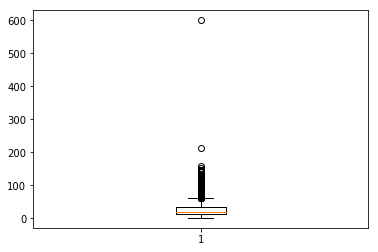

In [27]:
plt.boxplot(df['item_dim_length_meas'])
plt.show()

In [28]:
df = df[~(df['item_dim_length_meas'] > 150)]

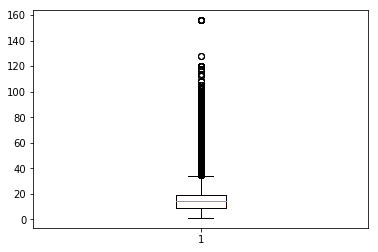

In [29]:
plt.boxplot(df['item_dim_width_meas'])
plt.show()

In [30]:
df = df[~(df['item_dim_width_meas'] > 150)]

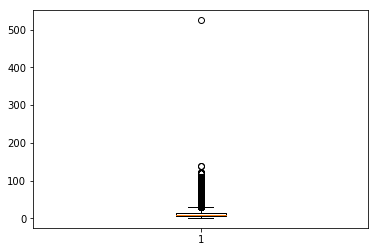

In [31]:
plt.boxplot(df['item_dim_height_meas'])
plt.show()

In [32]:
df = df[~(df['item_dim_height_meas'] > 150)]

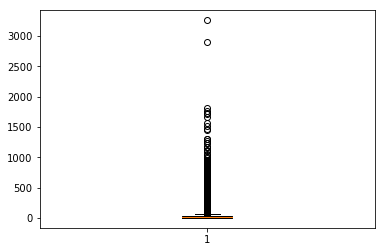

In [33]:
plt.boxplot(df['calc_wght_amt'])
plt.show()

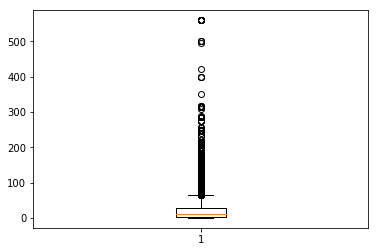

In [34]:
plt.boxplot(df['full_sku_weight_meas'])
plt.show()

In [35]:
df = df[~(np.logical_or(df['full_sku_weight_meas'] > (np.mean(df['full_sku_weight_meas'])+(4*np.std(df['full_sku_weight_meas']))), \
                 df['calc_wght_amt'] > (np.mean(df['calc_wght_amt'])+(4*np.std(df['calc_wght_amt'])))))]

In [36]:
df = df[~(np.logical_or(df['full_sku_weight_meas'] <= 1, df['calc_wght_amt'] <= 1))] 

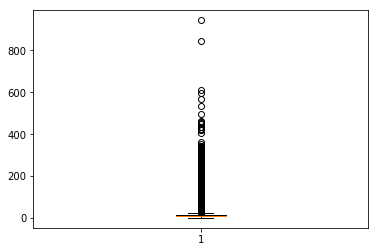

In [37]:
plt.boxplot(df['pkg_chrg_amt'])
plt.show()

In [38]:
df = df[~(np.logical_or(df['pkg_chrg_amt'] > (np.mean(df['pkg_chrg_amt'])+(4*np.std(df['pkg_chrg_amt']))), \
                df['pkg_chrg_amt'] < 1))]

In [39]:
df = df[~(np.logical_or(np.logical_or(df['item_dim_length_meas'] == 1, \
                  df['item_dim_width_meas'] == 1), \
                  df['item_dim_height_meas'] == 1))]

In [40]:
df = df.reset_index()
df = df.drop('index', axis = 1)

### models

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
list(df.columns)

['pkg_id',
 'sls_trans_line_id',
 'item_full_sku_num',
 'partner_num',
 'calc_zone_num',
 'item_qty',
 'carr_shpg_typ_cd',
 'carr_shpg_mthd_typ_desc',
 'orgn_terr_cd',
 'dstn_terr_cd',
 'calc_carr_grp_name',
 'item_dim_length_meas',
 'item_dim_width_meas',
 'item_dim_height_meas',
 'full_sku_weight_meas',
 'calc_wght_amt',
 'pkg_chrg_amt']

In [43]:
df.corr()

,calc_zone_num,item_qty,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt
calc_zone_num,1.00,-0.01,-0.05,-0.02,-0.01,-0.05,-0.06,0.17
item_qty,-0.01,1.00,-0.04,0.01,0.04,-0.02,0.02,-0.02
item_dim_length_meas,-0.05,-0.04,1.00,0.06,-0.18,0.54,0.51,0.48
item_dim_width_meas,-0.02,0.01,0.06,1.00,0.05,0.42,0.45,0.34
item_dim_height_meas,-0.01,0.04,-0.18,0.05,1.00,0.24,0.29,0.19
full_sku_weight_meas,-0.05,-0.02,0.54,0.42,0.24,1.00,0.89,0.66
calc_wght_amt,-0.06,0.02,0.51,0.45,0.29,0.89,1.00,0.79
pkg_chrg_amt,0.17,-0.02,0.48,0.34,0.19,0.66,0.79,1.00


In [44]:
import seaborn as sns

In [45]:
df[['item_dim_length_meas','item_dim_width_meas', 'item_dim_height_meas', 'pkg_chrg_amt']].head()

,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,pkg_chrg_amt
0,20.00,15.00,6.00,6.80
1,12.00,11.00,9.00,7.76
2,19.00,19.00,9.00,7.33
3,17.00,17.00,17.00,7.99
4,23.00,20.00,33.00,13.34


In [46]:
df_corr = df.corr()

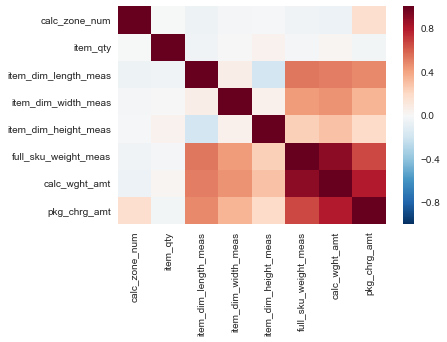

In [47]:
%matplotlib inline
sns.heatmap(df_corr)
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import scipy

In [54]:
df.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt,zone_3,zone_4,zone_5,zone_6,zone_7,zone_8,zone_44,zone_46,origin_AL,origin_AR,origin_AZ,origin_CA,origin_CO,origin_CT,origin_DE,origin_FL,origin_GA,origin_HI,origin_IA,origin_ID,origin_IL,origin_IN,origin_KS,origin_KY,origin_LA,origin_MA,origin_MD,origin_ME,origin_MI,origin_MN,origin_MO,origin_MS,origin_MT,origin_NC,origin_ND,origin_NE,origin_NH,origin_NJ,origin_NM,origin_NV,origin_NY,origin_OH,origin_OK,origin_OR,origin_PA,origin_RI,origin_SC,origin_SD,origin_TN,origin_TX,origin_UT,origin_VA,origin_VT,origin_WA,origin_WI,origin_WY,destination_AL,destination_AR,destination_AZ,destination_CA,destination_CO,destination_CT,destination_DC,destination_DE,destination_FL,destination_GA,destination_HI,destination_IA,destination_ID,destination_IL,destination_IN,destination_KS,destination_KY,destination_LA,destination_MA,destination_MD,destination_ME,destination_MI,destination_MN,destination_MO,destination_MS,destination_MT,destination_NC,destination_ND,destination_NE,destination_NH,destination_NJ,destination_NM,destination_NV,destination_NY,destination_OH,destination_OK,destination_OR,destination_PA,destination_RI,destination_SC,destination_SD,destination_TN,destination_TX,destination_UT,destination_VA,destination_VT,destination_WA,destination_WI,destination_WV,destination_WY
0,104024330,636559662,18746370-000-000,148,2,1,SMLLPRCL,Ground,PA,MD,UPS,20.00,15.00,6.00,15.00,11.00,6.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,103786636,636295821,17343839-000-006,94895,5,1,SMLLPRCL,Ground,NJ,IN,UPS,12.00,11.00,9.00,3.00,3.00,7.76,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,103483804,635958133,16679482-000-000,83151,2,1,SMLLPRCL,Ground,PA,NY,UPS,19.00,19.00,9.00,10.00,10.00,7.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,103203130,635774868,17762684-000-000,0,4,1,SMLLPRCL,Ground,UT,NV,UPS,17.00,17.00,17.00,8.00,23.00,7.99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104338197,636939490,91002369-000-888,602,5,1,SMLLPRCL,Ground,KY,FL,UPS,23.00,20.00,33.00,31.00,34.00,13.34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
zone_dummies = pd.get_dummies(df.calc_zone_num, prefix = 'zone').iloc[:, 1:]
df = pd.concat([df, zone_dummies], axis = 1)

In [51]:
carr_name_dummies = pd.get_dummies(df.calc_carr_grp_name, prefix = 'carr_name').iloc[:, 1:]
df = pd.concat([df, carr_name_dummies], axis = 1)

In [52]:
orgn_dummies = pd.get_dummies(df.orgn_terr_cd, prefix = 'origin').iloc[:, 1:]
df = pd.concat([df, orgn_dummies], axis = 1)

In [53]:
dstn_dummies = pd.get_dummies(df.dstn_terr_cd, prefix = 'destination').iloc[:,1:]
df = pd.concat([df, dstn_dummies], axis = 1)

In [56]:
f_cols = ['item_dim_length_meas',
 'item_dim_width_meas',
 'item_dim_height_meas',
 'calc_wght_amt']

In [57]:
X = df[f_cols]

In [58]:
y = df['pkg_chrg_amt']

In [59]:
print(X.shape)
print(y.shape)

(6236408, 4)
(6236408,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [111]:
train = df.sample(frac=0.8)
test = df.loc[~df.index.isin(train.index)]

In [112]:
print(train.shape)
print(test.shape)

(5497926, 122)
(1374481, 122)


In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [63]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.9738830239342997

In [113]:
lm_all = LinearRegression()
lm_all.fit(train[f_cols], train.pkg_chrg_amt)
lm_all_pred = lm_all.predict(test[f_cols])

In [114]:
list(zip(f_cols, lm_all.coef_))

[('item_dim_length_meas', 0.058508757375357823),
 ('item_dim_width_meas', 0.004832707554158191),
 ('item_dim_height_meas', -0.0010012475657380469),
 ('calc_wght_amt', 0.35774289820515381),
 ('zone_3', 0.90098949477067303),
 ('zone_4', 1.6443604949444737),
 ('zone_5', 2.8469838045786253),
 ('zone_6', 4.4157902615713231),
 ('zone_7', 6.0823244502407627),
 ('zone_8', 7.2204944784624354),
 ('carr_name_UPS', -3.6724407719524348)]

In [115]:
print(lm_all.score(train[f_cols], train['pkg_chrg_amt']))
print(mean_squared_error(lm_all_pred, test['pkg_chrg_amt']))
print(sqrt(mean_squared_error(lm_all_pred, test['pkg_chrg_amt'])))

0.686633163728
39.1746825551
6.258968170162841


In [166]:
rf_all = RandomForestRegressor()
rf_all.fit(train[f_cols], train.pkg_chrg_amt)
rf_all_pred = rf_all.predict(test[f_cols])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print(rf.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [200]:
print(rf_all.score(train[f_cols], train['pkg_chrg_amt']))
print(rf_all.score(test[f_cols], test['pkg_chrg_amt']))
print(mean_squared_error(rf_all_pred, test['pkg_chrg_amt']))
print(sqrt(mean_squared_error(rf_all_pred, test['pkg_chrg_amt'])))

0.953049775416
0.897603003682
13.6352371941
3.692592205220749


In [198]:
gb_all = GradientBoostingRegressor()
gb_all.fit(train[f_cols], train.pkg_chrg_amt)
gb_all_pred = gb_all.predict(test[f_cols])

In [199]:
print(gb_all.score(train[f_cols], train['pkg_chrg_amt']))
print(gb_all.score(test[f_cols], test['pkg_chrg_amt']))
print(mean_squared_error(gb_all_pred, test['pkg_chrg_amt']))
print(sqrt(mean_squared_error(gb_all_pred, test['pkg_chrg_amt'])))

0.853580372871
0.852823652462
19.5980788518
4.42697174734503


In [201]:
rf_all.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>

In [202]:
gb_all.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)>

### tuning random forest

In [203]:
rf_all = RandomForestRegressor(n_estimators=20)
rf_all.fit(train[f_cols], train.pkg_chrg_amt)
rf_all_pred = rf_all.predict(test[f_cols])

In [204]:
print(rf_all.score(train[f_cols], train['pkg_chrg_amt']))
print(rf_all.score(test[f_cols], test['pkg_chrg_amt']))
print(mean_squared_error(rf_all_pred, test['pkg_chrg_amt']))
print(sqrt(mean_squared_error(rf_all_pred, test['pkg_chrg_amt'])))

0.954504777819
0.89970805762
13.3549271186
3.654439371319068


In [116]:
rf_all = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score = True)
rf_all.fit(train[f_cols], train.pkg_chrg_amt)
rf_all_pred = rf_all.predict(test[f_cols])

In [117]:
print(rf_all.score(train[f_cols], train['pkg_chrg_amt']))
print(rf_all.score(test[f_cols], test['pkg_chrg_amt']))
print(mean_squared_error(rf_all_pred, test['pkg_chrg_amt']))
print(sqrt(mean_squared_error(rf_all_pred, test['pkg_chrg_amt'])))
print(mean_absolute_error(rf_all_pred, test['pkg_chrg_amt']))

0.930598335787
0.900521335574
12.4472716056
3.528069104426816
1.48219228166


In [118]:
all_predictions = rf_all.predict(df[f_cols])

In [122]:
list(zip(df['pkg_chrg_amt'], all_predictions))

[(6.7999999999999998, 7.7374953671092817),
 (7.7599999999999998, 8.3373586570582798),
 (7.3300000000000001, 7.8312401424764779),
 (7.9900000000000002, 9.3336309398137658),
 (10.09, 10.20758940476191),
 (13.34, 13.743079960317473),
 (22.25, 24.01447486097236),
 (6.9699999999999998, 9.0246314158253149),
 (7.9800000000000004, 8.3355059237445506),
 (7.5899999999999999, 7.9008026261780424),
 (24.109999999999999, 25.628152057803298),
 (15.67, 16.085173403531883),
 (56.469999999999999, 16.012896741478386),
 (18.02, 15.100995384615391),
 (6.9699999999999998, 9.277733058761525),
 (7.2800000000000002, 10.002781984126981),
 (8.4000000000000004, 8.8320070502902936),
 (7.2800000000000002, 8.214905499648836),
 (8.2599999999999998, 8.2508455559833376),
 (14.859999999999999, 9.7176031619777525),
 (10.76, 8.3384568650793671),
 (7.29, 7.2899999999999956),
 (7.8300000000000001, 8.1293157692307787),
 (13.67, 14.026006706349197),
 (14.380000000000001, 14.657203838511725),
 (8.5099999999999998, 8.6578279365

In [631]:
test.shape

(1374481, 122)

In [806]:
test['calc_wght_amt'].describe()

count   1374210.00
mean         23.80
std          22.96
min           2.00
25%           7.00
50%          15.00
75%          33.00
max         121.00
Name: calc_wght_amt, dtype: float64

In [807]:
test_0To5 = test[np.logical_and(test['calc_wght_amt'] > 0, test['calc_wght_amt'] <= 5)]

In [808]:
test_5To10 = test[np.logical_and(test['calc_wght_amt'] > 5, test['calc_wght_amt'] <= 10)]

In [809]:
test_10To15 = test[np.logical_and(test['calc_wght_amt'] > 10, test['calc_wght_amt'] <= 15)]

In [810]:
test_15To20 = test[np.logical_and(test['calc_wght_amt'] > 15, test['calc_wght_amt'] <= 20)]

In [811]:
test_20To25 = test[np.logical_and(test['calc_wght_amt'] > 20, test['calc_wght_amt'] <= 25)]

In [812]:
test_25To30 = test[np.logical_and(test['calc_wght_amt'] > 25, test['calc_wght_amt'] <= 30)]

In [813]:
test_30To35 = test[np.logical_and(test['calc_wght_amt'] > 30, test['calc_wght_amt'] <= 35)]

In [814]:
test_35To40 = test[np.logical_and(test['calc_wght_amt'] > 35, test['calc_wght_amt'] <= 40)]

In [815]:
test_40To45 = test[np.logical_and(test['calc_wght_amt'] > 40, test['calc_wght_amt'] <= 45)]

In [816]:
test_45To50 = test[np.logical_and(test['calc_wght_amt'] > 45, test['calc_wght_amt'] <= 50)]

In [817]:
test_50To55 = test[np.logical_and(test['calc_wght_amt'] > 50, test['calc_wght_amt'] <= 55)]

In [818]:
test_55To60 = test[np.logical_and(test['calc_wght_amt'] > 55, test['calc_wght_amt'] <= 60)]

In [819]:
test_60To65 = test[np.logical_and(test['calc_wght_amt'] > 60, test['calc_wght_amt'] <= 65)]

In [820]:
test_45To50 = test[np.logical_and(test['calc_wght_amt'] > 45, test['calc_wght_amt'] <= 50)]

In [821]:
test_50To55 = test[np.logical_and(test['calc_wght_amt'] > 50, test['calc_wght_amt'] <= 55)]

In [822]:
test_55To60 = test[np.logical_and(test['calc_wght_amt'] > 55, test['calc_wght_amt'] <= 60)]

In [823]:
test_60To65 = test[np.logical_and(test['calc_wght_amt'] > 60, test['calc_wght_amt'] <= 65)]

In [824]:
test_65To70 = test[np.logical_and(test['calc_wght_amt'] > 65, test['calc_wght_amt'] <= 70)]

In [825]:
test_70To75 = test[np.logical_and(test['calc_wght_amt'] > 70, test['calc_wght_amt'] <= 75)]

In [826]:
test_75To80 = test[np.logical_and(test['calc_wght_amt'] > 75, test['calc_wght_amt'] <= 80)]

In [827]:
test_80To85 = test[np.logical_and(test['calc_wght_amt'] > 80, test['calc_wght_amt'] <= 85)]

In [828]:
test_85To90 = test[np.logical_and(test['calc_wght_amt'] > 85, test['calc_wght_amt'] <= 90)]

In [829]:
test_90To95 = test[np.logical_and(test['calc_wght_amt'] > 90, test['calc_wght_amt'] <= 95)]

In [830]:
test_95To100 = test[np.logical_and(test['calc_wght_amt'] > 95, test['calc_wght_amt'] <= 100)]

In [831]:
test_100To105 = test[np.logical_and(test['calc_wght_amt'] > 100, test['calc_wght_amt'] <= 105)]

In [832]:
test_105To110 = test[np.logical_and(test['calc_wght_amt'] > 105, test['calc_wght_amt'] <= 110)]

In [833]:
test_110To115 = test[np.logical_and(test['calc_wght_amt'] > 110, test['calc_wght_amt'] <= 115)]

In [834]:
test_115To120 = test[np.logical_and(test['calc_wght_amt'] > 115, test['calc_wght_amt'] <= 120)]

In [835]:
test_120To125 = test[np.logical_and(test['calc_wght_amt'] > 120, test['calc_wght_amt'] <= 125)]

In [836]:
rf_all_p_0To5 = rf_all.predict(test_0To5[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_0To5, test_0To5['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_0To5, test_0To5['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

1.831
0.981


In [837]:
rf_all_p_5To10 = rf_all.predict(test_5To10[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_5To10, test_5To10['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_5To10, test_5To10['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

1.942
1.058


In [838]:
rf_all_p_10To15 = rf_all.predict(test_10To15[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_10To15, test_10To15['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_10To15, test_10To15['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

2.032
1.084


In [839]:
rf_all_p_15To20 = rf_all.predict(test_15To20[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_15To20, test_15To20['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_15To20, test_15To20['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

2.251
1.149


In [840]:
rf_all_p_20To25 = rf_all.predict(test_20To25[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_20To25, test_20To25['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_20To25, test_20To25['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

2.714
1.226


In [841]:
rf_all_p_25To30 = rf_all.predict(test_25To30[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_25To30, test_25To30['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_25To30, test_25To30['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

3.618
1.481


In [842]:
rf_all_p_30To35 = rf_all.predict(test_30To35[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_30To35, test_30To35['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_30To35, test_30To35['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

3.935
1.557


In [843]:
rf_all_p_35To40 = rf_all.predict(test_35To40[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_35To40, test_35To40['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_35To40, test_35To40['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

4.443
1.733


In [844]:
rf_all_p_40To45 = rf_all.predict(test_40To45[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_40To45, test_40To45['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_40To45, test_40To45['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

4.722
1.871


In [845]:
rf_all_p_45To50 = rf_all.predict(test_45To50[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_45To50, test_45To50['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_45To50, test_45To50['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

4.991
2.023


In [846]:
rf_all_p_50To55 = rf_all.predict(test_50To55[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_50To55, test_50To55['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_50To55, test_50To55['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

5.359
2.199


In [847]:
rf_all_p_55To60 = rf_all.predict(test_55To60[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_55To60, test_55To60['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_55To60, test_55To60['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

5.755
2.394


In [848]:
rf_all_p_60To65 = rf_all.predict(test_60To65[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_60To65, test_60To65['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_60To65, test_60To65['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

6.259
2.735


In [849]:
rf_all_p_65To70 = rf_all.predict(test_65To70[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_65To70, test_65To70['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_65To70, test_65To70['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

6.27
2.807


In [850]:
rf_all_p_70To75 = rf_all.predict(test_70To75[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_70To75, test_70To75['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_70To75, test_70To75['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

5.879
2.503


In [851]:
rf_all_p_75To80 = rf_all.predict(test_75To80[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_75To80, test_75To80['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_75To80, test_75To80['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

6.073
2.568


In [852]:
rf_all_p_80To85 = rf_all.predict(test_80To85[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_80To85, test_80To85['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_80To85, test_80To85['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

6.173
2.626


In [853]:
rf_all_p_85To90 = rf_all.predict(test_85To90[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_85To90, test_85To90['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_85To90, test_85To90['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

8.731
4.318


In [854]:
rf_all_p_90To95 = rf_all.predict(test_90To95[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_90To95, test_90To95['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_90To95, test_90To95['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

7.75
3.711


In [855]:
rf_all_p_95To100 = rf_all.predict(test_95To100[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_95To100, test_95To100['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_95To100, test_95To100['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

8.093
4.041


In [856]:
rf_all_p_100To105 = rf_all.predict(test_100To105[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_100To105, test_100To105['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_100To105, test_100To105['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

7.537
3.545


In [857]:
rf_all_p_105To110 = rf_all.predict(test_105To110[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_105To110, test_105To110['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_105To110, test_105To110['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

7.741
3.95


In [858]:
rf_all_p_110To115 = rf_all.predict(test_110To115[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_110To115, test_110To115['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_110To115, test_110To115['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

6.144
2.609


In [859]:
rf_all_p_115To120 = rf_all.predict(test_115To120[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_115To120, test_115To120['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_115To120, test_115To120['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

6.7
2.669


In [860]:
rf_all_p_120To125 = rf_all.predict(test_120To125[f_cols])
rmse = sqrt(mean_squared_error(rf_all_p_120To125, test_120To125['pkg_chrg_amt']))
mae = mean_absolute_error(rf_all_p_120To125, test_120To125['pkg_chrg_amt'])
print(round(rmse,3))
print(round(mae,3))

10.949
5.805


In [948]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(((y_true - y_pred) / y_true)) * 100

In [952]:
y_true = test_10To15.pkg_chrg_amt
y_pred = rf_all_p_10To15
round(mean_absolute_percentage_error(y_true, y_pred),2)

-2.29

In [789]:
df['pkg_chrg_amt'].describe()

count   6871051.00
mean         14.58
std          11.13
min           1.03
25%           8.46
50%          10.64
75%          15.67
max          71.14
Name: pkg_chrg_amt, dtype: float64

In [890]:
df[np.logical_and(np.logical_and(df['calc_wght_amt'] > 25, df['calc_wght_amt'] <= 125), \
                  df['pkg_chrg_amt'] > (np.mean(df['pkg_chrg_amt'])+(5*np.std(df['pkg_chrg_amt']))))].count()

pkg_id                     6605
sls_trans_line_id          6605
item_full_sku_num          6605
partner_num                6605
calc_zone_num              6605
item_qty                   6605
carr_shpg_typ_cd           6605
carr_shpg_mthd_typ_desc    6605
orgn_terr_cd               6605
dstn_terr_cd               6605
calc_carr_grp_name         6605
item_dim_length_meas       6605
item_dim_width_meas        6605
item_dim_height_meas       6605
full_sku_weight_meas       6605
calc_wght_amt              6605
pkg_chrg_amt               6605
zone_3                     6605
zone_4                     6605
zone_5                     6605
zone_6                     6605
zone_7                     6605
zone_8                     6605
carr_name_UPS              6605
origin_AL                  6605
origin_AR                  6605
origin_AZ                  6605
origin_CA                  6605
origin_CO                  6605
origin_CT                  6605
origin_DE                  6605
origin_F

In [783]:
df = df[~(np.logical_and(np.logical_and(df['calc_wght_amt'] > 20, df['calc_wght_amt'] <= 25), \
                  df['pkg_chrg_amt'] > (np.mean(df['pkg_chrg_amt'])+(4*np.std(df['pkg_chrg_amt'])))))]

In [800]:
df.count()

pkg_id                     6871051
sls_trans_line_id          6871051
item_full_sku_num          6871051
partner_num                6871051
calc_zone_num              6871051
item_qty                   6871051
carr_shpg_typ_cd           6871051
carr_shpg_mthd_typ_desc    6871051
orgn_terr_cd               6871051
dstn_terr_cd               6871051
calc_carr_grp_name         6871051
item_dim_length_meas       6871051
item_dim_width_meas        6871051
item_dim_height_meas       6871051
full_sku_weight_meas       6871051
calc_wght_amt              6871051
pkg_chrg_amt               6871051
zone_3                     6871051
zone_4                     6871051
zone_5                     6871051
zone_6                     6871051
zone_7                     6871051
zone_8                     6871051
carr_name_UPS              6871051
origin_AL                  6871051
origin_AR                  6871051
origin_AZ                  6871051
origin_CA                  6871051
origin_CO           

In [801]:
df.head()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt,zone_3,zone_4,zone_5,zone_6,zone_7,zone_8,carr_name_UPS,origin_AL,origin_AR,origin_AZ,origin_CA,origin_CO,origin_CT,origin_DE,origin_FL,origin_GA,origin_HI,origin_IA,origin_ID,origin_IL,origin_IN,origin_KS,origin_KY,origin_LA,origin_MA,origin_MD,origin_ME,origin_MI,origin_MN,origin_MO,origin_MS,origin_MT,origin_NC,origin_ND,origin_NE,origin_NH,origin_NJ,origin_NM,origin_NV,origin_NY,origin_OH,origin_OK,origin_OR,origin_PA,origin_RI,origin_SC,origin_SD,origin_TN,origin_TX,origin_UT,origin_VA,origin_VT,origin_WA,origin_WI,origin_WY,destination_AL,destination_AR,destination_AZ,destination_CA,destination_CO,destination_CT,destination_DC,destination_DE,destination_FL,destination_GA,destination_HI,destination_IA,destination_ID,destination_IL,destination_IN,destination_KS,destination_KY,destination_LA,destination_MA,destination_MD,destination_ME,destination_MI,destination_MN,destination_MO,destination_MS,destination_MT,destination_NC,destination_ND,destination_NE,destination_NH,destination_NJ,destination_NM,destination_NV,destination_NY,destination_OH,destination_OK,destination_OR,destination_PA,destination_RI,destination_SC,destination_SD,destination_TN,destination_TX,destination_UT,destination_VA,destination_VT,destination_WA,destination_WI,destination_WV,destination_WY
0,104024330,636559662,18746370-000-000,148,2,1,SMLLPRCL,Ground,PA,MD,UPS,20.00,15.00,6.00,15.00,11.00,6.80,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,103786636,636295821,17343839-000-006,94895,5,1,SMLLPRCL,Ground,NJ,IN,UPS,12.00,11.00,9.00,3.00,3.00,7.76,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,103483804,635958133,16679482-000-000,83151,2,1,SMLLPRCL,Ground,PA,NY,UPS,19.00,19.00,9.00,10.00,10.00,7.33,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,103203130,635774868,17762684-000-000,0,4,1,SMLLPRCL,Ground,UT,NV,UPS,17.00,17.00,17.00,8.00,23.00,7.99,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,103487815,635890900,15486959-000-004,90166,7,1,SMLLPRCL,Ground,PA,NM,FedEx,26.00,20.00,4.00,6.00,7.00,10.09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [802]:
df.tail()

,pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt,zone_3,zone_4,zone_5,zone_6,zone_7,zone_8,carr_name_UPS,origin_AL,origin_AR,origin_AZ,origin_CA,origin_CO,origin_CT,origin_DE,origin_FL,origin_GA,origin_HI,origin_IA,origin_ID,origin_IL,origin_IN,origin_KS,origin_KY,origin_LA,origin_MA,origin_MD,origin_ME,origin_MI,origin_MN,origin_MO,origin_MS,origin_MT,origin_NC,origin_ND,origin_NE,origin_NH,origin_NJ,origin_NM,origin_NV,origin_NY,origin_OH,origin_OK,origin_OR,origin_PA,origin_RI,origin_SC,origin_SD,origin_TN,origin_TX,origin_UT,origin_VA,origin_VT,origin_WA,origin_WI,origin_WY,destination_AL,destination_AR,destination_AZ,destination_CA,destination_CO,destination_CT,destination_DC,destination_DE,destination_FL,destination_GA,destination_HI,destination_IA,destination_ID,destination_IL,destination_IN,destination_KS,destination_KY,destination_LA,destination_MA,destination_MD,destination_ME,destination_MI,destination_MN,destination_MO,destination_MS,destination_MT,destination_NC,destination_ND,destination_NE,destination_NH,destination_NJ,destination_NM,destination_NV,destination_NY,destination_OH,destination_OK,destination_OR,destination_PA,destination_RI,destination_SC,destination_SD,destination_TN,destination_TX,destination_UT,destination_VA,destination_VT,destination_WA,destination_WI,destination_WV,destination_WY
6871046,119456988,653080502,21020639-000-073,93853,8,1,SMLLPRCL,Ground,NV,MD,UPS,13.00,5.00,10.00,6.00,5.00,9.89,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6871047,118853002,652490870,20799224-000-000,6842,8,2,SMLLPRCL,Ground,NY,FL,UPS,12.00,12.00,12.00,14.00,21.00,13.58,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6871048,118648339,652295059,18688265-000-000,90323,7,1,SMLLPRCL,Ground,GA,ID,UPS,32.00,27.00,25.00,25.00,62.00,23.72,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6871049,119398035,653089257,18688265-000-000,90323,4,2,SMLLPRCL,Ground,GA,MD,UPS,32.00,27.00,25.00,25.00,62.00,13.85,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6871050,119494345,653169981,18688265-000-000,90323,7,2,SMLLPRCL,Ground,GA,CA,UPS,32.00,27.00,25.00,25.00,62.00,23.68,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [924]:
print(round(np.min(test_120To125['pkg_chrg_amt']), 2))
print(round(np.max(test_120To125['pkg_chrg_amt']), 2))
print(round(np.mean(test_120To125['pkg_chrg_amt']), 2))

31.34
71.0
54.64


In [123]:
df_w_predt = pd.merge(df, pd.DataFrame(all_predictions), right_index=True, left_index=True)

In [126]:
df_w_predt=df_w_predt.rename(columns = {0:'pkg_p'})

In [127]:
df_w_predt.loc[np.logical_and(df_w_predt['calc_wght_amt'] > 20, df_w_predt['calc_wght_amt'] <= 25), \
           ['pkg_chrg_amt', 'pkg_p']].head(n = 500)

,pkg_chrg_amt,pkg_p
3,7.99,9.33
23,13.67,14.03
33,8.55,10.44
55,7.99,8.43
60,15.04,15.04
69,7.99,8.41
74,14.11,13.13
76,19.40,19.43
82,7.81,8.05
107,24.45,22.08


In [326]:
final.loc[np.logical_and(final['item_full_sku_num'] == '17841779-000-002', \
                        final['p_zone_avg'] == final['calc_zone_num']), \
          ['item_full_sku_num', 'partner_num','p_zone_avg','calc_zone_num', 'pkg_chrg_amt','pkg_p','calc_carr_grp_name']]

,item_full_sku_num,partner_num,p_zone_avg,calc_zone_num,pkg_chrg_amt,pkg_p,calc_carr_grp_name
137,17841779-000-002,148,4,4,7.29,8.15,UPS
139,17841779-000-002,148,4,4,7.29,8.15,UPS
143,17841779-000-002,148,4,4,10.39,8.15,UPS
151,17841779-000-002,148,4,4,7.29,8.15,UPS
2397,17841779-000-002,148,4,4,7.30,8.15,UPS
10484,17841779-000-002,148,4,4,7.84,8.51,UPS
12206,17841779-000-002,148,4,4,7.58,8.15,UPS
12208,17841779-000-002,148,4,4,7.58,8.15,UPS
12215,17841779-000-002,148,4,4,7.58,8.15,UPS
13970,17841779-000-002,148,4,4,7.90,8.30,UPS


In [327]:
final.loc[final['p_zone_avg'] == final['calc_zone_num'], \
          ['item_full_sku_num', 'partner_num','p_zone_avg','calc_zone_num', 'pkg_chrg_amt','pkg_p','calc_carr_grp_name']].\
head(n = 100)

,item_full_sku_num,partner_num,p_zone_avg,calc_zone_num,pkg_chrg_amt,pkg_p,calc_carr_grp_name
17,14484743-000-000,148,4,4,7.97,8.70,UPS
18,14506433-000-000,148,4,4,8.10,8.97,UPS
22,14506433-000-000,148,4,4,11.37,8.55,UPS
36,11886630-000-003,148,4,4,11.18,8.48,UPS
47,11886635-000-007,148,4,4,10.98,8.57,UPS
51,11886635-000-007,148,4,4,10.98,8.57,UPS
54,17841779-000-001,148,4,4,7.29,8.15,UPS
66,17409930-000-006,148,4,4,11.21,8.63,UPS
72,17409930-000-006,148,4,4,7.87,8.35,UPS
75,10676035-000-004,148,4,4,8.10,8.96,UPS


In [156]:
partner_avg_zone = df_w_predt.groupby('partner_num', as_index=False).agg({'calc_zone_num':'mean'})

In [161]:
partner_avg_zone = partner_avg_zone.rename(columns={'calc_zone_num':'p_zone_avg'})

In [163]:
final = pd.merge(df_w_predt, partner_avg_zone, on = 'partner_num')

In [169]:
final['p_zone_avg'] = final['p_zone_avg'].astype(int)

In [176]:
final.to_pickle('final_df.pkl')

In [184]:
final.to_csv('final.csv', index=False)

In [374]:
final[['pkg_id',
 'sls_trans_line_id',
 'item_full_sku_num',
 'partner_num',
 'calc_zone_num',
 'item_qty',
 'carr_shpg_typ_cd',
 'carr_shpg_mthd_typ_desc',
 'orgn_terr_cd',
 'dstn_terr_cd',
 'calc_carr_grp_name',
 'item_dim_length_meas',
 'item_dim_width_meas',
 'item_dim_height_meas',
 'full_sku_weight_meas',
 'calc_wght_amt',
 'pkg_chrg_amt',
 'zone_3',
 'zone_4',
 'zone_5',
 'zone_6',
 'zone_7',
 'zone_8',
 'carr_name_UPS',
 'pkg_p',
 'p_zone_avg']].to_csv('final_df.csv', index=False)

In [252]:
list(final.columns)

['pkg_id',
 'sls_trans_line_id',
 'item_full_sku_num',
 'partner_num',
 'calc_zone_num',
 'item_qty',
 'carr_shpg_typ_cd',
 'carr_shpg_mthd_typ_desc',
 'orgn_terr_cd',
 'dstn_terr_cd',
 'calc_carr_grp_name',
 'item_dim_length_meas',
 'item_dim_width_meas',
 'item_dim_height_meas',
 'full_sku_weight_meas',
 'calc_wght_amt',
 'pkg_chrg_amt',
 'zone_3',
 'zone_4',
 'zone_5',
 'zone_6',
 'zone_7',
 'zone_8',
 'carr_name_UPS',
 'origin_AL',
 'origin_AR',
 'origin_AZ',
 'origin_CA',
 'origin_CO',
 'origin_CT',
 'origin_DE',
 'origin_FL',
 'origin_GA',
 'origin_HI',
 'origin_IA',
 'origin_ID',
 'origin_IL',
 'origin_IN',
 'origin_KS',
 'origin_KY',
 'origin_LA',
 'origin_MA',
 'origin_MD',
 'origin_ME',
 'origin_MI',
 'origin_MN',
 'origin_MO',
 'origin_MS',
 'origin_MT',
 'origin_NC',
 'origin_ND',
 'origin_NE',
 'origin_NH',
 'origin_NJ',
 'origin_NM',
 'origin_NV',
 'origin_NY',
 'origin_OH',
 'origin_OK',
 'origin_OR',
 'origin_PA',
 'origin_RI',
 'origin_SC',
 'origin_SD',
 'origin_TN',


In [375]:
import pandas as pd
import teradata
import getpass
from teradata import DatabaseError

username = input("Enter Teradata Username: ")
pw=getpass.getpass(prompt = "Enter Teradata Password: ")


udaExec = teradata.UdaExec(appName="Database access", version="1.0", logConsole=False)
session = udaExec.connect(method="odbc", system="POEDW2", authentication="ldap", username=username,
                          password=pw)

def td_python(query):
    return pd.read_sql(query, session)

def dropTableIfExists(table_name):  # passes a drop statement and tries statement to see if table already exists
    try:
        query = 'DROP TABLE ' + table_name
        session.execute(query)
    except DatabaseError as err:
        print ('Warning: Encountered the following error when trying to drop table:')
        print (err)
        pass

def executeQuery(query):
    session.execute(query)

def insertInto(table_name, tuples, query):
    for k in range((int(len(tuples)/100000))+1):
        a = k*100000
        b = min((k+1)*100000,len(tuples))

        print ('Now Writing: ' + str([a,b]))

        session.executemany('INSERT INTO ' + table_name + query,
                            tuples[a:b],
                            batch=True)


def create_query_from_df(df, table_name):
    column_names = list(df.columns)
    final_string_elements = []
    final_column_names = []
    for column in column_names:
        column = column.replace(" ","_")
        column = column.replace(".","")
        column = column.replace("/","")
        column = column.replace("(","_")
        column = column.replace(")","_")
        column = column.replace("__","_")
        final_column_names.append(column) 
        line = column + " VARCHAR(1000)"
        final_string_elements.append(line)

    final_string = ','.join(final_string_elements)
    create_table_query = 'CREATE TABLE '+ 'USER_WORKING.'+ table_name + ' (' +final_string.upper()+ ')' + ' NO PRIMARY INDEX;'
    
    column_string = ','.join(final_column_names)
    q_marks_count = len(column_names) 
    question_mark_string = '?,' * q_marks_count 
    question_mark_string = question_mark_string.strip(",")
    insert_into_query = '(' + column_string + ')'+ ' VALUES (' + question_mark_string + ')' 
    
    return (create_table_query, insert_into_query)

Enter Teradata Username: nkamavaram
Enter Teradata Password: ········


In [376]:
create, insert = create_query_from_df(final[['pkg_id',
 'sls_trans_line_id',
 'item_full_sku_num',
 'partner_num',
 'calc_zone_num',
 'item_qty',
 'carr_shpg_typ_cd',
 'carr_shpg_mthd_typ_desc',
 'orgn_terr_cd',
 'dstn_terr_cd',
 'calc_carr_grp_name',
 'item_dim_length_meas',
 'item_dim_width_meas',
 'item_dim_height_meas',
 'full_sku_weight_meas',
 'calc_wght_amt',
 'pkg_chrg_amt',
 'zone_3',
 'zone_4',
 'zone_5',
 'zone_6',
 'zone_7',
 'zone_8',
 'carr_name_UPS',
 'pkg_p',
 'p_zone_avg']], "test_table")

In [377]:
create

'CREATE TABLE USER_WORKING.test_table (PKG_ID VARCHAR(1000),SLS_TRANS_LINE_ID VARCHAR(1000),ITEM_FULL_SKU_NUM VARCHAR(1000),PARTNER_NUM VARCHAR(1000),CALC_ZONE_NUM VARCHAR(1000),ITEM_QTY VARCHAR(1000),CARR_SHPG_TYP_CD VARCHAR(1000),CARR_SHPG_MTHD_TYP_DESC VARCHAR(1000),ORGN_TERR_CD VARCHAR(1000),DSTN_TERR_CD VARCHAR(1000),CALC_CARR_GRP_NAME VARCHAR(1000),ITEM_DIM_LENGTH_MEAS VARCHAR(1000),ITEM_DIM_WIDTH_MEAS VARCHAR(1000),ITEM_DIM_HEIGHT_MEAS VARCHAR(1000),FULL_SKU_WEIGHT_MEAS VARCHAR(1000),CALC_WGHT_AMT VARCHAR(1000),PKG_CHRG_AMT VARCHAR(1000),ZONE_3 VARCHAR(1000),ZONE_4 VARCHAR(1000),ZONE_5 VARCHAR(1000),ZONE_6 VARCHAR(1000),ZONE_7 VARCHAR(1000),ZONE_8 VARCHAR(1000),CARR_NAME_UPS VARCHAR(1000),PKG_P VARCHAR(1000),P_ZONE_AVG VARCHAR(1000)) NO PRIMARY INDEX;'

In [378]:
insert

'(pkg_id,sls_trans_line_id,item_full_sku_num,partner_num,calc_zone_num,item_qty,carr_shpg_typ_cd,carr_shpg_mthd_typ_desc,orgn_terr_cd,dstn_terr_cd,calc_carr_grp_name,item_dim_length_meas,item_dim_width_meas,item_dim_height_meas,full_sku_weight_meas,calc_wght_amt,pkg_chrg_amt,zone_3,zone_4,zone_5,zone_6,zone_7,zone_8,carr_name_UPS,pkg_p,p_zone_avg) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'

In [379]:
dropTableIfExists("user_working.test_table")

(3807, "[42S02] [Teradata][ODBC Teradata Driver][Teradata Database] Object 'user_working.test_table' does not exist. ")


In [364]:
executeQuery(create)

In [365]:
tuples = tuple(final.loc[:2000, ['pkg_id',
 'sls_trans_line_id',
 'item_full_sku_num',
 'partner_num',
 'calc_zone_num',
 'item_qty',
 'carr_shpg_typ_cd',
 'carr_shpg_mthd_typ_desc',
 'orgn_terr_cd',
 'dstn_terr_cd',
 'calc_carr_grp_name',
 'item_dim_length_meas',
 'item_dim_width_meas',
 'item_dim_height_meas',
 'full_sku_weight_meas',
 'calc_wght_amt',
 'pkg_chrg_amt',
 'zone_3',
 'zone_4',
 'zone_5',
 'zone_6',
 'zone_7',
 'zone_8',
 'carr_name_UPS',
 'pkg_p',
 'p_zone_avg']].apply(tuple, axis=1))

In [366]:
insertInto('user_working.test_table', tuples, insert)

Now Writing: [0, 2001]
